<a href="https://colab.research.google.com/github/isaacmoore/random_analysis/blob/master/Question%206/Scrape_the_IMDB_Top_250_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [0]:
url = 'https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc&start='
starter = ['1','51','101','151','201']

In [0]:
movie_list = []
movie_rank = []
movie_year = []
movie_rating = []
movie_metascore = []
movie_n_votes = []

for x in starter:
  page = requests.get(url+x)
  soup = BeautifulSoup(page.content, "html.parser")
  movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')

  for i in range(len(movie_containers)):
    movie = movie_containers[i]
    #Movie Name
    movie_list.append(movie.h3.a.text)
    #Rank
    movie_rank.append(movie.h3.span.text)
    #Year
    a = movie.h3
    movie_year.append(a.find_all('span', class_ = 'lister-item-year text-muted unbold')[0].text)
    #Rating
    movie_rating.append(movie.strong.text)
    #Meta Score
    if len(movie.find_all('div', class_ = 'inline-block ratings-metascore')) == 0:
      movie_metascore.append(np.NaN)
    else:
      mscore = movie.find_all('div', class_ = 'inline-block ratings-metascore')[-1]
      movie_metascore.append(int(mscore.span.text))
    #Number of Votes
    votes = movie.find('span', attrs = {'name':'nv'})
    movie_n_votes.append(int(votes['data-value']))


In [0]:
#=== Creating the dataframe ===
df = pd.DataFrame({'rank':movie_rank,'name':movie_list,'year':movie_year,'rating':movie_rating,'metascore':movie_metascore,'n_votes':movie_n_votes})
df.tail()

,rank,name,year,rating,metascore,n_votes
245,246.,"Monsters, Inc.",(2001),8.0,78.0,760803
246,247.,Aladdin,(1992),8.0,86.0,338385
247,248.,Castle in the Sky,(1986),8.0,78.0,131730
248,249.,The Terminator,(1984),8.0,84.0,752437
249,250.,Butch Cassidy and the Sundance Kid,(1969),8.0,66.0,191384


In [0]:
#=== Cleaning the dataframe ===
#df['year'] = df.year.str.replace('(','').str.replace(')','')
#df['year'] = df.year.str.replace('I ','')
#df['year'] = df.year.astype(int)
df['rating'] = df.rating.astype(float)

In [0]:
df.head()

,rank,name,year,rating,metascore,n_votes
0,1.,The Shawshank Redemption,1994,9.3,80.0,2161214
1,2.,The Godfather,1972,9.2,100.0,1483295
2,3.,The Dark Knight,2008,9.0,84.0,2136136
3,4.,The Godfather: Part II,1974,9.0,90.0,1032895
4,5.,The Lord of the Rings: The Return of the King,2003,8.9,94.0,1534621


## EDA

Movie with the worst metascore

In [0]:
df[(df.metascore == df.metascore.min())]

,rank,name,year,rating,metascore,n_votes
90,91.,Snatch,2000,8.3,55.0,734973


Movie with the most number of votes

In [0]:
df[(df.n_votes == df.n_votes.max())]

,rank,name,year,rating,metascore,n_votes
0,1.,The Shawshank Redemption,1994,9.3,80.0,2161214


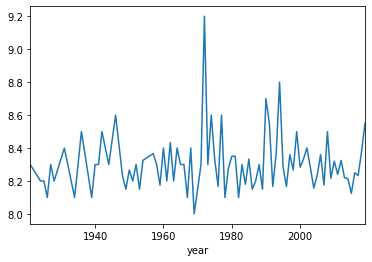

In [0]:
df.groupby('year').rating.mean().plot()

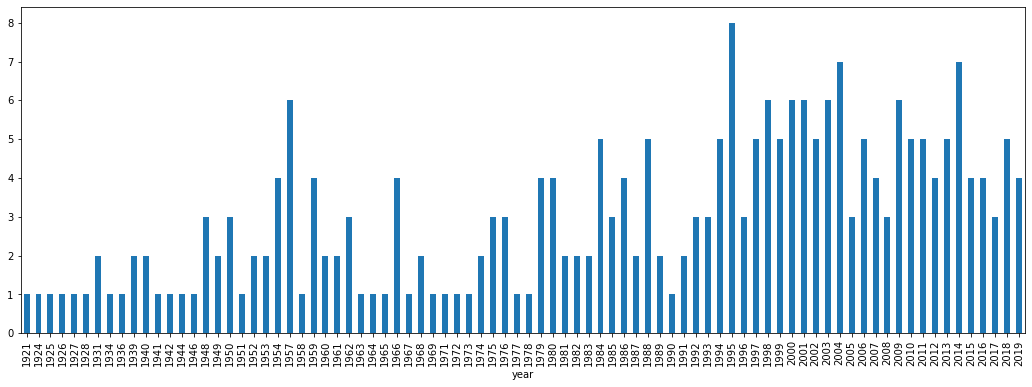

In [0]:
df.groupby('year').name.count().plot(kind='bar',figsize=[18,6])

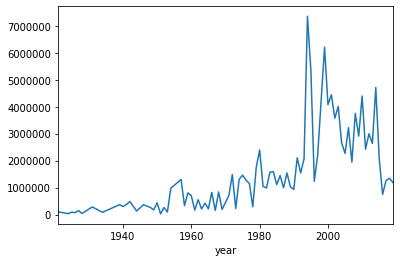

In [0]:
df.groupby('year').n_votes.sum().plot()